In [5]:
%load_ext autoreload
%autoreload 2
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from EntryExitModel import EntryExitModel

model = EntryExitModel()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**BAIN-SYLOS-LABINI-MODIGLIANI MODEL**

**Model presentation:**

Bain-Sylos-Modigliani model investigates the reality of strategic barriers to market entry. It is based on five main assumptions:

Assumption1: Number of firms. $I = {M,E}$ is a finite sample of competitive firms within the market considered. M is a monopolist and E is a potential entrant.

Assumption 2: Omogeneous products. Every firm $i \in I$ produces one good only; the goods produced by the two firms in I are homogeneous. 

Assumption 3: Market demand. The preferences of consumers determine the demand function $p = P(Q)$, where p is the demand price and Q is the quantity demanded by the market, defined by the following features:
$$P(Q) = d - bQ \;\;\; \forall Q \in[0,\frac{d}{b}]$$
$$P(Q) = 0 \; \text{per} \; Q\geq\frac{d}{b}$$

Assumption 4: Costs. The production costs of firm $i \in I$ are defined by the function $C(q_i) = cq_i + F$, where $q_i$ is the quantity produced and sold by a generic firm i, c is the marginal cost, and F is the fixed cost.

Assumption 5: Temporal structure. At time $t_0$, firm M decides how much to produce; at time $t_1$, once firm E has acknowledged the quantity chosen by firm M, it decides how much to produce with a constraint: if in stage 1, at $t_0$, firm M has decided to produce a quantity that is greater or equal to Y, then E does not enter the market (its optimal quantity is 0).

Assumption 6: Strategies. The strategy of a firm M is the real number $q_M \in Q_M = [0, \frac{a}{b}]$, where $a = d - c$; the strategy of a firm E is a function defined in $Q_M$ and having value in $[0, \frac{a}{b} - q_M]$:$Q_E = {q_E : Q_M \rightarrow [0, \frac{a}{b} - q_M]}$. The strategic space of solutions is then given by $Q = Q_M \times Q_E$. Every function in Q_E have the property that if $q_M \geq Y$, then $q_E = 0$. 


Assumptions 1, 4 and 5 define the market players and their possible strategies. The other assumptions allow the determination of the two firms' profits and the possible outcomes of the game. These are: 
$ \; \Pi_j = [a - b(q_M + q_E)]q_j - F \;$ and $(j = M,E)$ 
where $a = d - c$, the game is thus well defined.


 **Model resolution**
The model is solved as a two-staged strategic game by backward induction. The study of the second stage allows for a clear interpretation of the meaning of Y. In the last stage, firm E, the potential entrant, decides whether or not to enter the market based on its profit function. This is:

In [6]:
model.profit_e_sym()

-F + q_e*(a - b*(q_e + q_m))

In the second stage the entrant chooses the quantity that maximizes its profit. The first order condition for the maximization of its profits implies a reaction function like this: 

In [7]:
reaction_e, profit_2nd_stage_e, Y  =model.second_stage_of_the_game()
reaction_e

(a - b*q_m)/(2*b)

Resulting, the profit of firm E in case of entry is as follows: 


In [8]:
profit_2nd_stage_e

-F + (a - b*q_m)**2/(4*b)

 Firm E will decide to enter the market if and only if $ \Pi_E > 0$ or if and only if $  q_M < Y$ where $Y$ is defined as:

In [9]:
Y

(a*b - 2*sqrt(F*b**3))/b**2

Now, let's analyze the first stage of the game: in this stage firm M determines the amount to produce, taking into account the threshold Y determined by $a$,$b$, and $F$. Two are the possible scenarios: either the potential entrant has entered the market in the second stage or it it has not.
The profit function of firm M is piece-wise continous:  


In [10]:
profit_m_sym = model.profit_m_sym()
profit_m_sym

Piecewise((-F + q_m*(a - b*(q_e + q_m)), q_m < (a*b - 2*sqrt(F*b**3))/b**2), (-F + q_m*(a - b*q_m), True))

The optimal quantity of firm M changes depending on the value of Y. It can be profitable to let the potential entrant enter the market, to block the entry or to act as a pure monopolist. 

In [11]:
profit_m, profit_m_e, profit_m_ne, block_condition, deterred_condition, accomodation_condition, acc_profit, crit_points1, crit_points2 = model.first_stage_of_the_game()

If the threshold for the second firm to enter the market (Y) is smaller than the quantity that a pure monopolist would choose, the entrant will be blocked. This implies that the first firm, by operating as a monopolist and maximizing its profit, will also block the entry of the second firm. The situation is illustrated in Figure 3

In [12]:
block_condition

F >= a**2/(16*b)

Entry is deterred when Firm 1 produces Y instead of the monopoly quantity to prevent Firm 2 from entering the market (Figure 2), maximizing its profit. This happens when: 

In [13]:
deterred_condition

(a**2/(16*b) > F) & (a**2*(3 - 2*sqrt(2))/(32*b) <= F)

There is entry accomodation when It is profitable for firm 1 to produce a quantity that allow firm 2 to enter in the market (Figure 1)

In [14]:
accomodation_condition

(0 < F) & (a**2*(3 - 2*sqrt(2))/(32*b) > F)

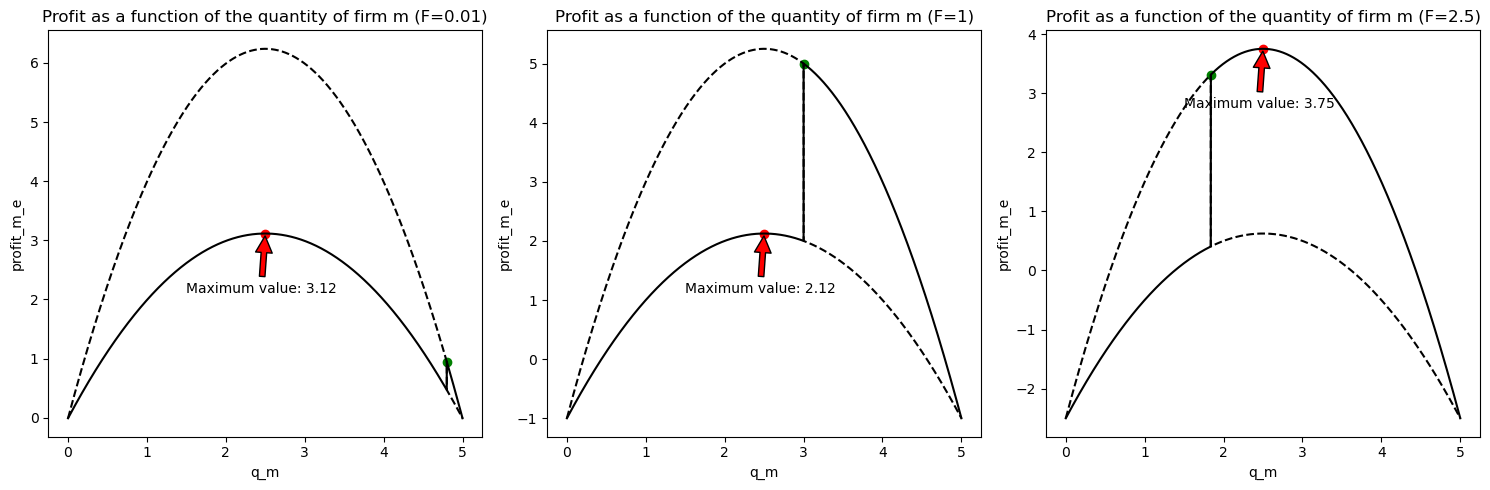

In [15]:
model.plot_profit_m()

**Graphical illustration 1** : 
Whether firm M chooses a demand quantity that deterres, blocks E's entry depends on the Y threshold, which in turn depends on a,b, and F. Figures 1 to 3 show that firm M's optimal choice depends crucially on F, the fixed cost. As F increases, E is less likely to enter the market and the quantity M needs to produce to deters its entry decreases. Accordingly, the probability that $q_M > Y$ increases, resulting, at the beginning, in higher profits for M. 

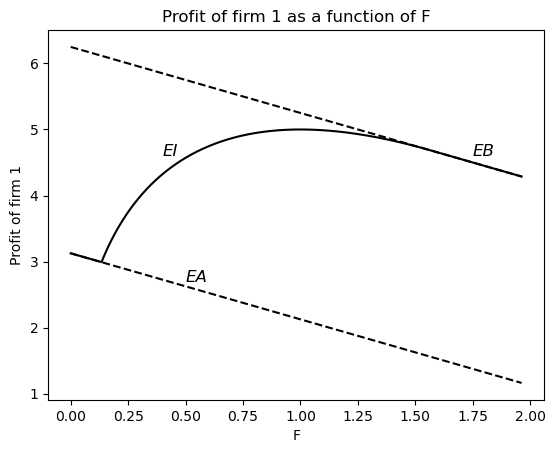

In [16]:
model.plot_profit_m_2()

We will now proceed to fully solve the model using numerical methods. The reasoning is the same applied above, we solve the model by backward induction.
 We added a multiple start input when It comes to optimizing firm M's profit because when entry is deterred, the maximum is not an interior point but an extremum point, meaning that, depending on the initial condition, the optimization algorithm may or may not converge to this maximum. 
 We will now try 3 different approeaches: 
 1) Random initial condition 
 2) Multiple start approach
 3) Use Y as initial condition, since we know that it's the optimal quantity when entry is deterred (cheating).

A random initial condition does not converge to the global maximum but to a local one. It converges to a situation in which entry is accomodate even if in this case it is more profitable to deter the entry. This can be seen below, since $a=d-c=5$ and $F=1$, we know that the maximum is achieved when $q_m = Y$.

In [79]:
q_m, q_e =model.m_opt(multiple_start=False,initial_condition_norandom=False,initial_condition_random=True)

Optimal quantity for the incumbent firm: 2.5
Equilibium profit for the incumbent firm: 2.125
Optimal quantity for the entrant firm: 1.25
Equilibium profit for the entrant firm: 0.5625
Y is equal to: 2.95


A multiple-start approach, instead, allows the algorithm to converge to our solution (It requires 1 minute and 51 seconds to run). 

In [49]:
q_m, q_e =model.m_opt(multiple_start=True,initial_condition_norandom=False,initial_condition_random=False)

/Users/iariorlandi/anaconda3/lib/python3.11/site-packages/scipy/optimize/_zeros_py.py:318: RuntimeWarning: Derivative was zero.
  warnings.warn(msg, RuntimeWarning)


Optimal quantity for the incumbent firm: 2.902382303666101
Equilibium profit for the incumbent firm: 5.088088481696361
Optimal quantity for the entrant firm: 0
Entrant does not enter in the market
Y is equal to: 2.95


Our last case is when we use  $Y$ as the initial condition, since we know that it's the optimal quantity when entry is deterred. However, it's not always possible to know the solution of the model before running the numerical algorithm, meaning that, this is not an ideal solution, so we prefer the multiple-start approach.

In [80]:
q_m, q_e =model.m_opt(multiple_start=False,initial_condition_norandom=True,initial_condition_random=False)

Optimal quantity for the incumbent firm: 2.902382303793118
Equilibium profit for the incumbent firm: 5.088088481594143
Optimal quantity for the entrant firm: 0
Entrant does not enter in the market
Y is equal to: 2.95


Now it is interesting to understand how the equilibrium changes when we remove the possibility for firm 2 to enter or exit the market, we modify this assumption by assuming that in stage 2 firm 2 is in the market. The only difference with respect to firm 1 is the timing of the optimization. This is known as Stakelberg model

In [4]:
q_m_ext, q_e_ext = model.m_opt_ext()

Optimal quantity for the leader firm: 2.5
Equilibium profit for the leader firm: 2.125
Optimal quantity for the follower firm: 1.25
Equilibium profit for the follower firm: 0.5625


As we can see by removing the decision for firm 2 to enter or exit the market we will end up to be in the same equilibrium that we would have when there is entry accomodation: the leader produce an higher quantity thanks to the first moving advantage.